In [ ]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier


In [2]:
df = pd.read_csv("customer_churn.csv")
df.head()
# df.info()
# df.describe()
# df.isnull().sum()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Show column data types
print(df.dtypes)

# List categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Features:", categorical_cols)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object
Categorical Features: Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [4]:
# Clening the data

# Drop customerID (Not Useful)
df.drop(columns=["customerID"], inplace=True)

# Convert TotalCharges to Numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df.fillna(df["TotalCharges"].median(), inplace=True)  # Fill missing values if any

# Apply Label Encoding to Binary Categorical Features
binary_cols = ["gender", "Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]

for col in binary_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0, "Male": 1, "Female": 0})

# Apply One-Hot Encoding to Multi-Class Categorical Features
multi_class_cols = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                    "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies",
                    "Contract", "PaymentMethod"]

df = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)  # Drop first category to avoid redundancy


In [5]:
# Check Data again

# df.head()
df.info()
# df.describe()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   PaperlessBilling                       7043 non-null   int64  
 7   MonthlyCharges                         7043 non-null   float64
 8   TotalCharges                           7043 non-null   float64
 9   Churn                                  7043 non-null   int64  
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

Churn
0    5174
1    1869
Name: count, dtype: int64


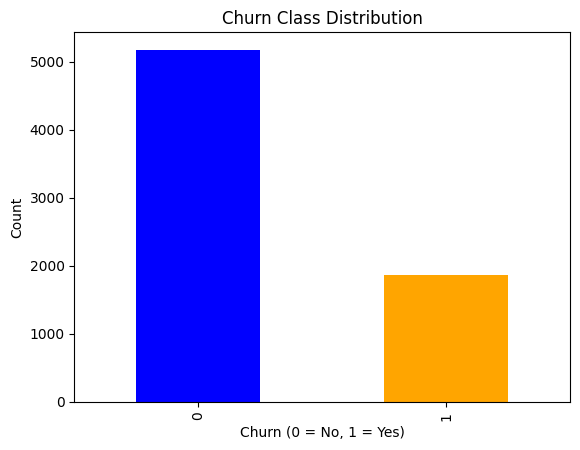

In [6]:
# Count the number of occurrences of each class
print(df["Churn"].value_counts())

# Visualize the distribution
df["Churn"].value_counts().plot(kind="bar", color=["blue", "orange"])
plt.title("Churn Class Distribution")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


In [7]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Let's train some models

### First lets train models without tuning to check what is best

In [8]:
accuracy_scores = {}

In [9]:
# Train a Logistic Regression Model
model_lr = LogisticRegression(max_iter=500)

# Scale results for LogisticRegression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_lr.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model_lr.predict(X_test_scaled)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

accuracy_scores["LogisticRegression"] = accuracy_score(y_test, y_pred)

Logistic Regression Accuracy: 0.8197303051809794


In [10]:
# Train a Decision Tree Model
model_lr = DecisionTreeClassifier()
model_lr.fit(X_train, y_train)

# Evaluate the model
y_pred = model_lr.predict(X_test)
print(f"DecisionTreeClassifier Accuracy: {accuracy_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

accuracy_scores["DecisionTreeClassifier"] = accuracy_score(y_test, y_pred)

DecisionTreeClassifier Accuracy: 0.7125621007806955


In [11]:
# Train a Random Forest Classification Model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# Evaluate the model
y_pred = model_rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

accuracy_scores["RandomForestClassifier"] = accuracy_score(y_test, y_pred)

Random Forest Accuracy: 0.7885024840312278


In [12]:
# Train a SVM Model
model_svm = SVC(probability=True)
model_svm.fit(X_train, y_train)

# Evaluate the model
y_pred = model_lr.predict(X_test)
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

accuracy_scores["SVM"] = accuracy_score(y_test, y_pred)

SVM Accuracy: 0.7125621007806955


In [13]:
# Train a XGBoost Model
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

# Evaluate the model
y_pred = model_xgb.predict(X_test)
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred)}")
#print(classification_report(y_test, y_pred))

accuracy_scores["XGBoost"] = accuracy_score(y_test, y_pred)

XGBoost Accuracy: 0.7984386089425124


In [14]:
accuracy_scores

{'LogisticRegression': 0.8197303051809794,
 'DecisionTreeClassifier': 0.7125621007806955,
 'RandomForestClassifier': 0.7885024840312278,
 'SVM': 0.7125621007806955,
 'XGBoost': 0.7984386089425124}

### From the above data I will continue with LogisticRegression, RandomForestClassifier and XGBoost for Tuining

### First too much information can create noise in the model, let's only use the top 10 features

In [15]:
# Remove weak correlated features

selector = SelectKBest(score_func=f_classif, k=15)  # Keep top 15 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)
print("")

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

Selected Features: Index(['tenure', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service',
       'OnlineBackup_No internet service',
       'DeviceProtection_No internet service',
       'TechSupport_No internet service', 'StreamingTV_No internet service',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check'],
      dtype='object')



In [ ]:
# Logistic Regression with tuning hyperparameters
param_grid = [
    {
        'penalty': ['l2', None],
        'C': [0.5, 1, 2, 5],
        'solver': ['lbfgs', 'newton-cg', 'sag'],
        'max_iter': [100, 200]
    },
    {
        'penalty': ['l1', 'l2'],
        'C': [0.5, 1, 2, 5],
        'solver': ['liblinear'],
        'max_iter': [100, 200,]
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.5, 1, 2, 5],
        'l1_ratio': [0.1, 0.5, 0.9],
        'solver': ['saga'],
        'max_iter': [100, 200]
    }
]


model = LogisticRegression(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1, verbose=1,error_score=np.nan)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model_lr = grid_search.best_estimator_

best_model_lr.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = best_model_lr.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

accuracy_scores["LogisticRegression_Tuned"] = accuracy_score(y_test, y_pred)

Fitting 5 folds for each of 88 candidates, totalling 440 fits


/home/jamie/churnprediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jamie/churnprediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jamie/churnprediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jamie/churnprediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jamie/churnprediction/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/jamie/churnpredicti

Best Parameters: {'C': 2, 'l1_ratio': 0.5, 'max_iter': 200, 'penalty': 'elasticnet', 'solver': 'saga'}
Accuracy: 0.8204400283889283
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



In [ ]:
# Random Forest Classifier with tuning hyperparameters

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2],
}

model = RandomForestClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model_rf = grid_search.best_estimator_

best_model_rf.fit(X_train, y_train)

# Evaluate the model
y_pred = best_model_rf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

accuracy_scores["RandomForestClassifier_Tuned"] = accuracy_score(y_test, y_pred)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Accuracy: 0.8119233498935415
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.76      0.73      0.74      1409
weighted avg       0.80      0.81      0.81      1409



In [ ]:
# XGBoost Model with tuning hyperparameters

param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 5, 10],
    "min_child_weight": [1, 3],
    "gamma": [0, 0.1],
}


model = XGBClassifier()
grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model_xgb = grid_search.best_estimator_

best_model_xgb.fit(X_train, y_train)

# Evaluate the model
y_pred = best_model_xgb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

accuracy_scores["XGBClassifier_Tuned"] = accuracy_score(y_test, y_pred)

Best Parameters: {'gamma': 0, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 100}
Accuracy: 0.8055358410220014
              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1036
           1       0.69      0.49      0.57       373

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.79      0.81      0.79      1409



In [19]:
# Sorting the models by accuracy score from highest to lowest
sorted_models = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)
df = pd.DataFrame(sorted_models, columns=['Model', 'Accuracy'])
df

,Model,Accuracy
0,LogisticRegression_Tuned,0.820440
1,LogisticRegression,0.819730
2,RandomForestClassifier_Tuned,0.811923
3,XGBClassifier_Tuned,0.805536
4,XGBoost,0.798439
5,RandomForestClassifier,0.788502
6,DecisionTreeClassifier,0.712562
7,SVM,0.712562


In [ ]:
# Save best model
joblib.dump(best_model_lr, "churn_model.pkl")


['churn_model.pkl']